<a href="https://colab.research.google.com/github/francoissouza/Winding-MMF-optimization/blob/main/Winding_MMF_optimization_Francois_de_S_Martins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align = "justify">

# Winding Distribution Optimization by MMF Distortion Minimization.


---


## Abstract
In this paper, a genetic algorithm is used to find the best set of winding schemes for electric machines in single or multiphase systems that exhibit low magnetomotive force distortion (MMF).

## Introduction
First, a strategy for generating feasible and symmetric electrical machine windings using the winding distribution table (WDT) and the phasor star techniques are investigated. An algorithm is implemented to generate and analyze single and multi-phase machines, varying the number of layers, slots, poles, coil pitch (for double-layer diamond/imbricate winding ), and even empty slots. [Pyrhoonen][Smolensky][Casuso].

Then, the magnetomotive force (MMF) in the air-gap machines is investigated. The interest is to determine the distortion in a MMF curve of windings by using a computational composition of each MMF, generated by each conductor in a slot. The Fourier transform is used to determine the coefficients of harmonic distortion through a MMF. [4][5]

Finally, a genetic algorithm is used to find the best winding sets, i.e., the winding that has less MMF distortion.

## Conditions for Symmetric Winding Design.
A winding is considered feasible if it is possible to distribute the phases along the slots and achieve uniform occupancy by all phases [Pyrhoonen]. To be feasible, a winding must meet two conditions:

* The first condition: The winding must have an integer number of coils per phase, as shown in Eq. 01.
\begin{align}
 n_{lay}\frac{N - n_{es}}{2m} \in \mathbb{N},  \\
\end{align}

  Where $N$ is the number of slots, $n_{es}$ is the number of empty slots (i.e., slots with no coil side), $n_{lay}$ is the number of layers and $m$ is the number of phases.

* The second condition: The angle between phase windings $\alpha_{ph}$ must be an integral multiple of the angle between slots $\alpha_{z}$.
  * For normal systems (the number of phases $m$ is an odd number or a multiple of 3), this is expressed by Eq. 02
\begin{align}
 \frac{\alpha_{ph}}{\alpha_{z}} = \frac{2\pi N}{m2 \pi t} = \frac{N}{mt} \in \mathbb{N},  \\
\end{align}

  * For reduced systems (the number of phases $m$ is an even number), this is expressed by Eq. 03
\begin{align}
 \frac{\alpha_{ph}}{\alpha_{z}} = \frac{\pi N}{m2 \pi t} = \frac{N}{2mt} \in \mathbb{N},  \\
\end{align}

  Where $t$ is the greatest common divisor of $N$ and $p$, and $p$ is the number of pole pairs of the winding.

If both conditions are satisfied, a feasible winding is possible. Otherwise, it is not possible to create a symmetric winding.

Once a feasible winding is achieved, the symmetry condition must be checked. This is done by analysing the phasor star, which is calculated by summing all the coil-side contributions of each phase and gives a phase diagram of the voltage or electromotive force (EMF). This procedure is illustrated below using a three-phase machine with 24 slots, 2 pole pairs, and a single-layer winding.

This EMF machine star consists of $t=2$ EMF sub-stars which are superimposed and each sub-star is formed by $N/t$ phasors, phase-shifted to each other by an electrical angle $\alpha$ equal to.

\begin{align}
\alpha = t \frac{360 ^\circ}{N} \\
\end{align}


Then is obtained Table 1, which has $t$ rows and $N/t$ columns, and each element is associated with an electrical angle of $\phi_k$, where

\begin{align}
\phi_{k} = k \cdot \alpha wich k = 0, 1, \dots, N/t-1 \\
\end{align}

$\phi_k$  | $0^\circ$       | $\alpha$       | $\dots$     | $(N/t-1)\alpha$
----------|-----------------|----------------|-------------|-----------------
1-st row  | 1               | 2              | $\dots$     | $N/t$
$\dots$   | $\dots$         | $\dots$        | $\dots$     | $\dots$    
t-th row  | $\mbox{(j-1)(N/t+1)}$  | $\mbox{(j-1)(N/t+2)}$ | $\dots$ | $N$

In this case, the place and current direction of each phase is shown in Fig. 01. Later will be demonstrated how to obtain this conductor arrangement by the WDT method. Note that $\alpha = t \cdot 360 ^\circ / N = 2 \cdot 360 ^\circ / 24 = 30 ^\circ$ is the angle between the slots. 

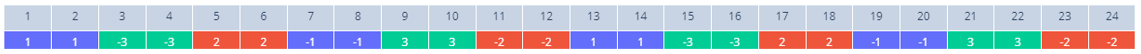

To illustrate how the phasor star is calculated, a study of the contribution of the first phase conductors is shown in Fig. 1 by the number $1$ or $-1$. In the first slot, the first phase current flows in the positive direction and $\phi_{k} = k \cdot \alpha = 0 \cdot 30 ^\circ = 0 ^\circ$, since $k = 0$ for the first slot position. For this application, it is only necessary to check the symmetry so that the magnitude of the phasors of the slot is assumed to be unitary and the argument (or angle) of the phasor is given by $\phi_{k}$. This means that all coils have the same number of turns and each contributes with the same EMF. So for the first conductor of the first phase, which is on the first slot, the EMF contribution is:

\begin{align}
EMF_{11} =  1 \angle \phi_{k=1} = 1 \angle 0 ^\circ \\
\end{align}

Using a similar process, the EMF contribution of the second conductor of the first phase placed on the second slot is:

\begin{align}
EMF_{12} =  1 \angle \phi_{k=2} = 1 \angle 30 ^\circ \\
\end{align}

When a conductor has the opposite direction of current (represented by a negative number), the argument of EMF is phase-shifted by $180 ^\circ$
In this way, we can create Table 2, which contains all the contributions of the conductors for the first phase and the resulting phasor from the sum of them.

$EMF_{phase, \phi_{k}}$ | Slot | Direction | Argument	        | Phasor 		
----------------------------------|-------|--------------|----------------------------|-------------------------------------
$EMF_{1,1}$		     | $1$  | $1$	         | $0 ^\circ$	        | $1 \angle 0 ^\circ $  
$EMF_{1,2}$		     |$2$   | $1$	         | $30 ^\circ$	        | $1 \angle 30 ^\circ $  
$EMF_{1,7}$		     | $7$  | $-1$         | $360 ^\circ$	        | $1 \angle 360 ^\circ $  
$EMF_{1,8}$		     |$8$   | $-1$         | $390 ^\circ$	        | $1 \angle 390 ^\circ $  
$EMF_{1,13}$	     | $13$| $1$	         | $360 ^\circ$	        | $1 \angle 360 ^\circ $  
$EMF_{1,14}$	     |$14$ | $1$	         | $390 ^\circ$	        | $1 \angle 390 ^\circ $  
$EMF_{1,19}$	     | $19$| $-1$         | $720 ^\circ$	        | $1 \angle 720 ^\circ $  
$EMF_{1,20}$	     |$20$ | $-1$         | $750 ^\circ$	        | $1 \angle 750 ^\circ $  
----------------------------------|-------|--------------|----------------------------|-------------------------------------
$EMF_{1}$ 		     | -	   | -	         | $15 ^\circ$	        | $1 \angle 15 ^\circ $

Doing this for all phases will give the total EMF Phasor Star, as shown in Table 3.

$EMF_{phase}$	| Phasor 		
------------- |--------------------------
$EMF_{1}$ 		| $7.72\angle15^\circ$ 
$EMF_{2}$ 		| $7.72 \angle 135 ^\circ $
$EMF_{3}$ 		| $7.72 \angle -105 ^\circ $

Therefore, the symmetry condition is satisfied for normal systems (systems with an odd number of phases) or non-reduced systems (systems with a multiple of the 3 number of phases) if all the resulting phasors have the same magnitude and their angular displacement is equal and equivalent to $360 ^\circ / m = 360 ^\circ / 3 = 120 ^\circ$. In this case, the winding is symmetric because all EMF phasors have the same magnitude of $7.72$ and are shifted with respect to each other by $120 ^\circ$.

If a reduced system is being considered (systems with an even number of phases and that does not is a multiple of 3) the symmetry conditions are satisfied if all the resulting phasors have the same magnitude and their angular displacement is equal and equivalent to $180 ^\circ / m$.

Fig. 2 shows the phasor star for this example. It is possible to verify the symmetry of the found EMF.

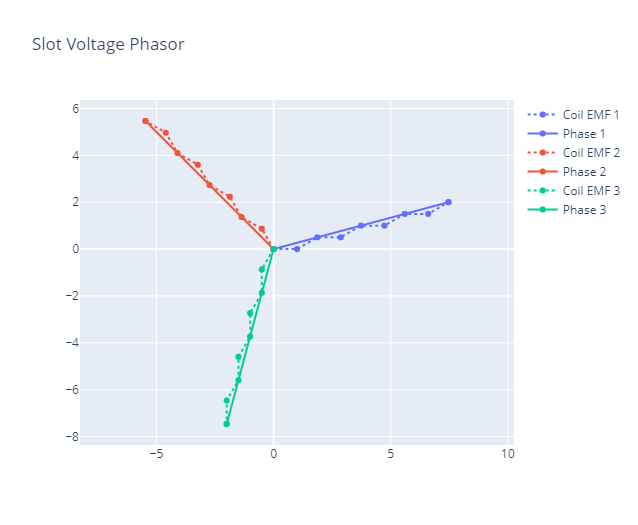


## Winding Distribution Table.
A very powerful and simple method to create the conductor distribution of a winding is called Winding Distribution Table (WDT). In [Caruso] the procedure to create the WDT is demonstrated.

First, an empty table with $m$ rows and $n_{c}=N/m$ is created like a Table 4. 

$-$		| col. 1		| col. 2		| $\dots$	| col. $n_c$
--------------------|-------------------|------------------|-------------------|-------------
row 1		| $a_{11}$	| $a_{12}$	| $\dots$	| $a_{n_c}$
row 2		| $a_{21}$	| $a_{22}$	| $\dots$	| $a_{2n_c}$
row 3		| $a_{31}$	| $a_{22}$	| $\dots$	| $a_{3n_c}$
$\dots$	| $\dots$	| $\dots$	| $\dots$	| $\dots$
row m		|(m-1)$n_c$+1|(m-1)$n_c$+2| $\dots$	| $a_{mn_c}$

It is assumed that the first element $a_{11}$ is the first slot $1$. Then, to assign the second slot $2$, starting from the position of slot $1$ (from left to right and from top to bottom), add $p$ elements to the new position. If after adding $p$ elements the reached position is already occupied by another slot, jump to the next consecutive position until an empty slot is reached. So for the third slot $3$, starting from the position of slot $2$, add $p$ elements to reach a new position and continue.

To illustrate this procedure, the same three-phase machine with 24 slots, 2 pole pairs, and a single-layer winding is used, and the resulting WDT is shown in Table 4. 

$-$	| $-$	| $-$	| $-$	||| $-$	| $-$	| $-$	| $-$	
----------|---------|---------|---------|||-------|---------|---------|-----------
$1$	| $13$	| $2$	| $14$	||| $3$	| $15$	| $4$	| $16$	
$5$	| $17$	| $6$	| $18$	||| $7$	| $19$	| $8$	| $20$	
$9$	| $21$	| $10$	| $22$	||| $11$	| $23$	| $12$	| $24$	

In fact, the WDT for this machine consists of $t^{'} = 2$ sub-WDT, where

\begin{align}
&t^{'} = gcd(z, p) \\
&z = n_{lay} p (q-a) \\
&q = \frac{N - n_{es}}{2pm} = a + \frac{z}{n_{lay}p} \\
\end{align}

Where $t^{'}$ is the greatest common divisor of $z$ and $p$, $q$ is the number of slots per pole and phase, $z$ is the numerator of the indivisible fraction of $q$, and $a$ is the largest integer less than or equal to $q$. For this sub-WDT, there are $N^{'} = N / t^{'} = 12$ slots and $p^{'} = p / t^{'} = 1$ poles. Moreover, the first sub-WDT has the first $N^{'}$ slots (from 1 to 12) and the second has the other $N^{'}$ slots (from 13 to 24). Following the same procedure as described above, you can create the sub-WDT tables below and by summing these tables you get the total WDT.

$-$	| $-$	||| $-$	| $-$	
----------|---------|||-------|-------
$1$	| $2$	||| $3$	| $4$	
$5$	| $6$	||| $7$	| $8$	
$9$	| $10$	||| $11$	| $12$	

and

$-$	| $-$	||| $-$	| $-$	
----------|---------|||-------|-------
$13$	| $14$	||| $15$| $16$	
$17$	| $18$	||| $19$| $20$	
$21$	| $22$	||| $23$| $24$	

For symmetric non-reduced and normal systems, after calculating the WTD, it is necessary to shift the "right member" of the WDT up by $\zeta$ rows, where

\begin{align}
\zeta =& \frac{m-1}{2} & \text{if m is odd}, \\
\zeta =& \frac{m}{2}-1 & \text{if m is even}. 
\end{align}


This procedure is shown in Fig. 3.

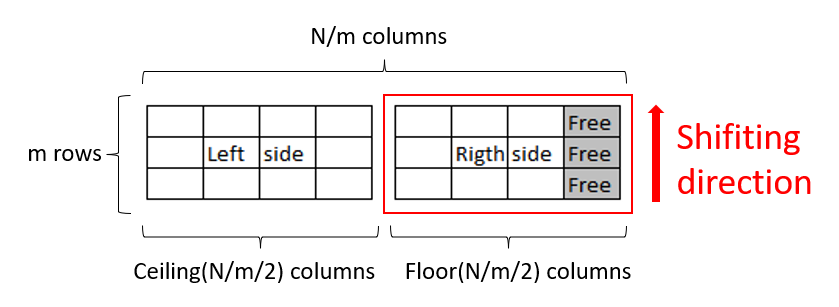

If the machine has free slots, they must be removed from the WDT by excluding the last columns. For example, in Fig. 3, there are 3 free slots and the last column must be excluded. After removing the free slots, the "left and right members" must be redistributed.

Note that in some machine configurations the WDT results in an odd number of columns and it is impossible to get an equal number of columns in "left" and "right members". In these cases, the left member must be rounded to the nearest integer greater o equal to $N/m/2$ and the right member must be rounded to the to the nearest integer less or equal to $N/m/2$. It is important to lead with this asymmetry to computational implementation.

After the shift, each row of the WDT represents a phase of the system, and each element in a row indicates the slot and the current direction of the conductors.

For the considered example, the final WDT representing the whole machine winding is shown in Table 8 and is consistent with Fig. 1.

$-$	| $-$	| $-$	| $-$	||| $-$	| $-$	| $-$	| $-$	
----------|---------|---------|---------|||-------|---------|---------|-----------
$1$	| $13$	| $2$	| $14$	||| $-7$	| $-8$	| $-19$	| $-20$	
$5$	| $17$	| $6$	| $18$	||| $-11$| $-12$| $-23$	| $-24$	
$9$	| $21$	| $10$	| $22$	||| $-3$	| $-4$	| $-15$	| $-16$	

If it is a reduced system, the raw WDT is unaffected by the vertical shift, but the quadrants labelled 1 and 3 in Figure 4 are simply swapped and then all the elements of the "new right member" are rotated to the negative. After this operation, the WDT rows must be reordered in an intercalation form, which is shown in Table 9.

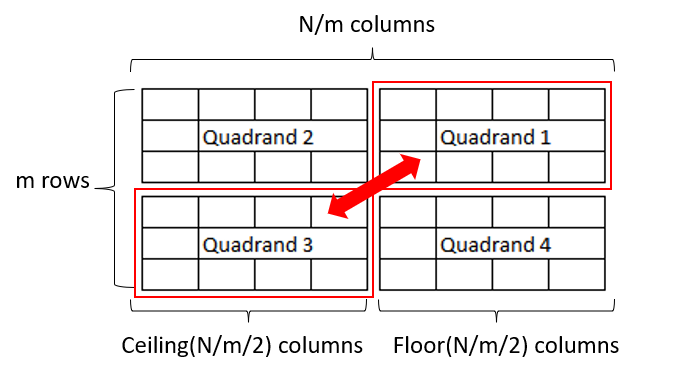

Phase		|col. 1	|col.2	|$\dots$	|col. N/m	|$\rightarrow$	|Phase		|col. 1	|col.2	|$\dots$	|col. N/m	
----------------|-------|-------|---------------|---------------|---------------|---------------|-------|-------|---------------|---------------
$1$		|$\dots$|$\dots$|$\dots$	|$\dots$	|$\rightarrow$	|$1$		|$\dots$|$\dots$|$\dots$	|$\dots$	
$\dots$		|$\dots$|$\dots$|$\dots$	|$\dots$	|$\rightarrow$	|$\frac{m}{2}+1$|$\dots$|$\dots$|$\dots$	|$\dots$	
$\frac{m}{2}$ 	|$\dots$|$\dots$|$\dots$	|$\dots$	|$\rightarrow$	|$\frac{m}{2}+2$|$\dots$|$\dots$|$\dots$	|$\dots$
$\frac{m}{2}+1$	|$\dots$|$\dots$|$\dots$	|$\dots$	|$\rightarrow$	|$\dots$	|$\dots$|$\dots$|$\dots$	|$\dots$
$\dots$		|$\dots$|$\dots$|$\dots$	|$\dots$	|$\rightarrow$	|$\frac{m}{2}$ 	|$\dots$|$\dots$|$\dots$	|$\dots$	
$m$		|$\dots$|$\dots$|$\dots$	|$\dots$	|$\rightarrow$	|$m$		|$\dots$|$\dots$|$\dots$	|$\dots$	

Reduced systems whose number of phases is not a power of 2 are composed of $m_g$ groups of $m_u$ phase systems, where

\begin{align}
m_{u} = gpf(m) \\
\end{align}

is the greatest prime factor of m, and

\begin{align}
m_{g} = \frac{m}{m_u} \\
\end{align}

For example, considering a system with 12 phases, it can be decomposed into $m_g = 4$ groups of $m_u = 3$ phase systems. The even phases of each $m_g$ group must then be multiplied by -1 to make them radially symmetric and avoid the use of a natural line. 

If the machine has 2 layers, the WDT must be added with another WDT shifted by the coil pitch and multiplied by -1.

For illustration, consider a machine with 6 phases, 36 slots, 4 poles, 2 layers, 7 slots of coil pitch, and 6 free slots. Refer to Table 10 for the WDT for this winding and to Fig. 5, Fig. 6 and Fig. 7 for the phasor star, current direction per phase and winding diagram, respectively.

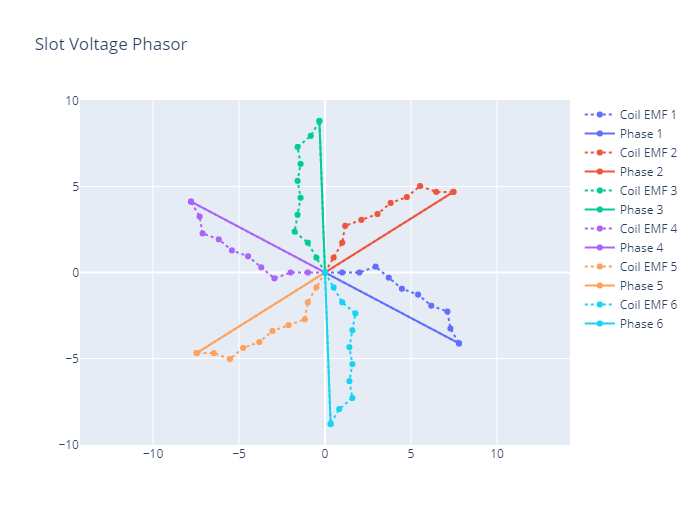

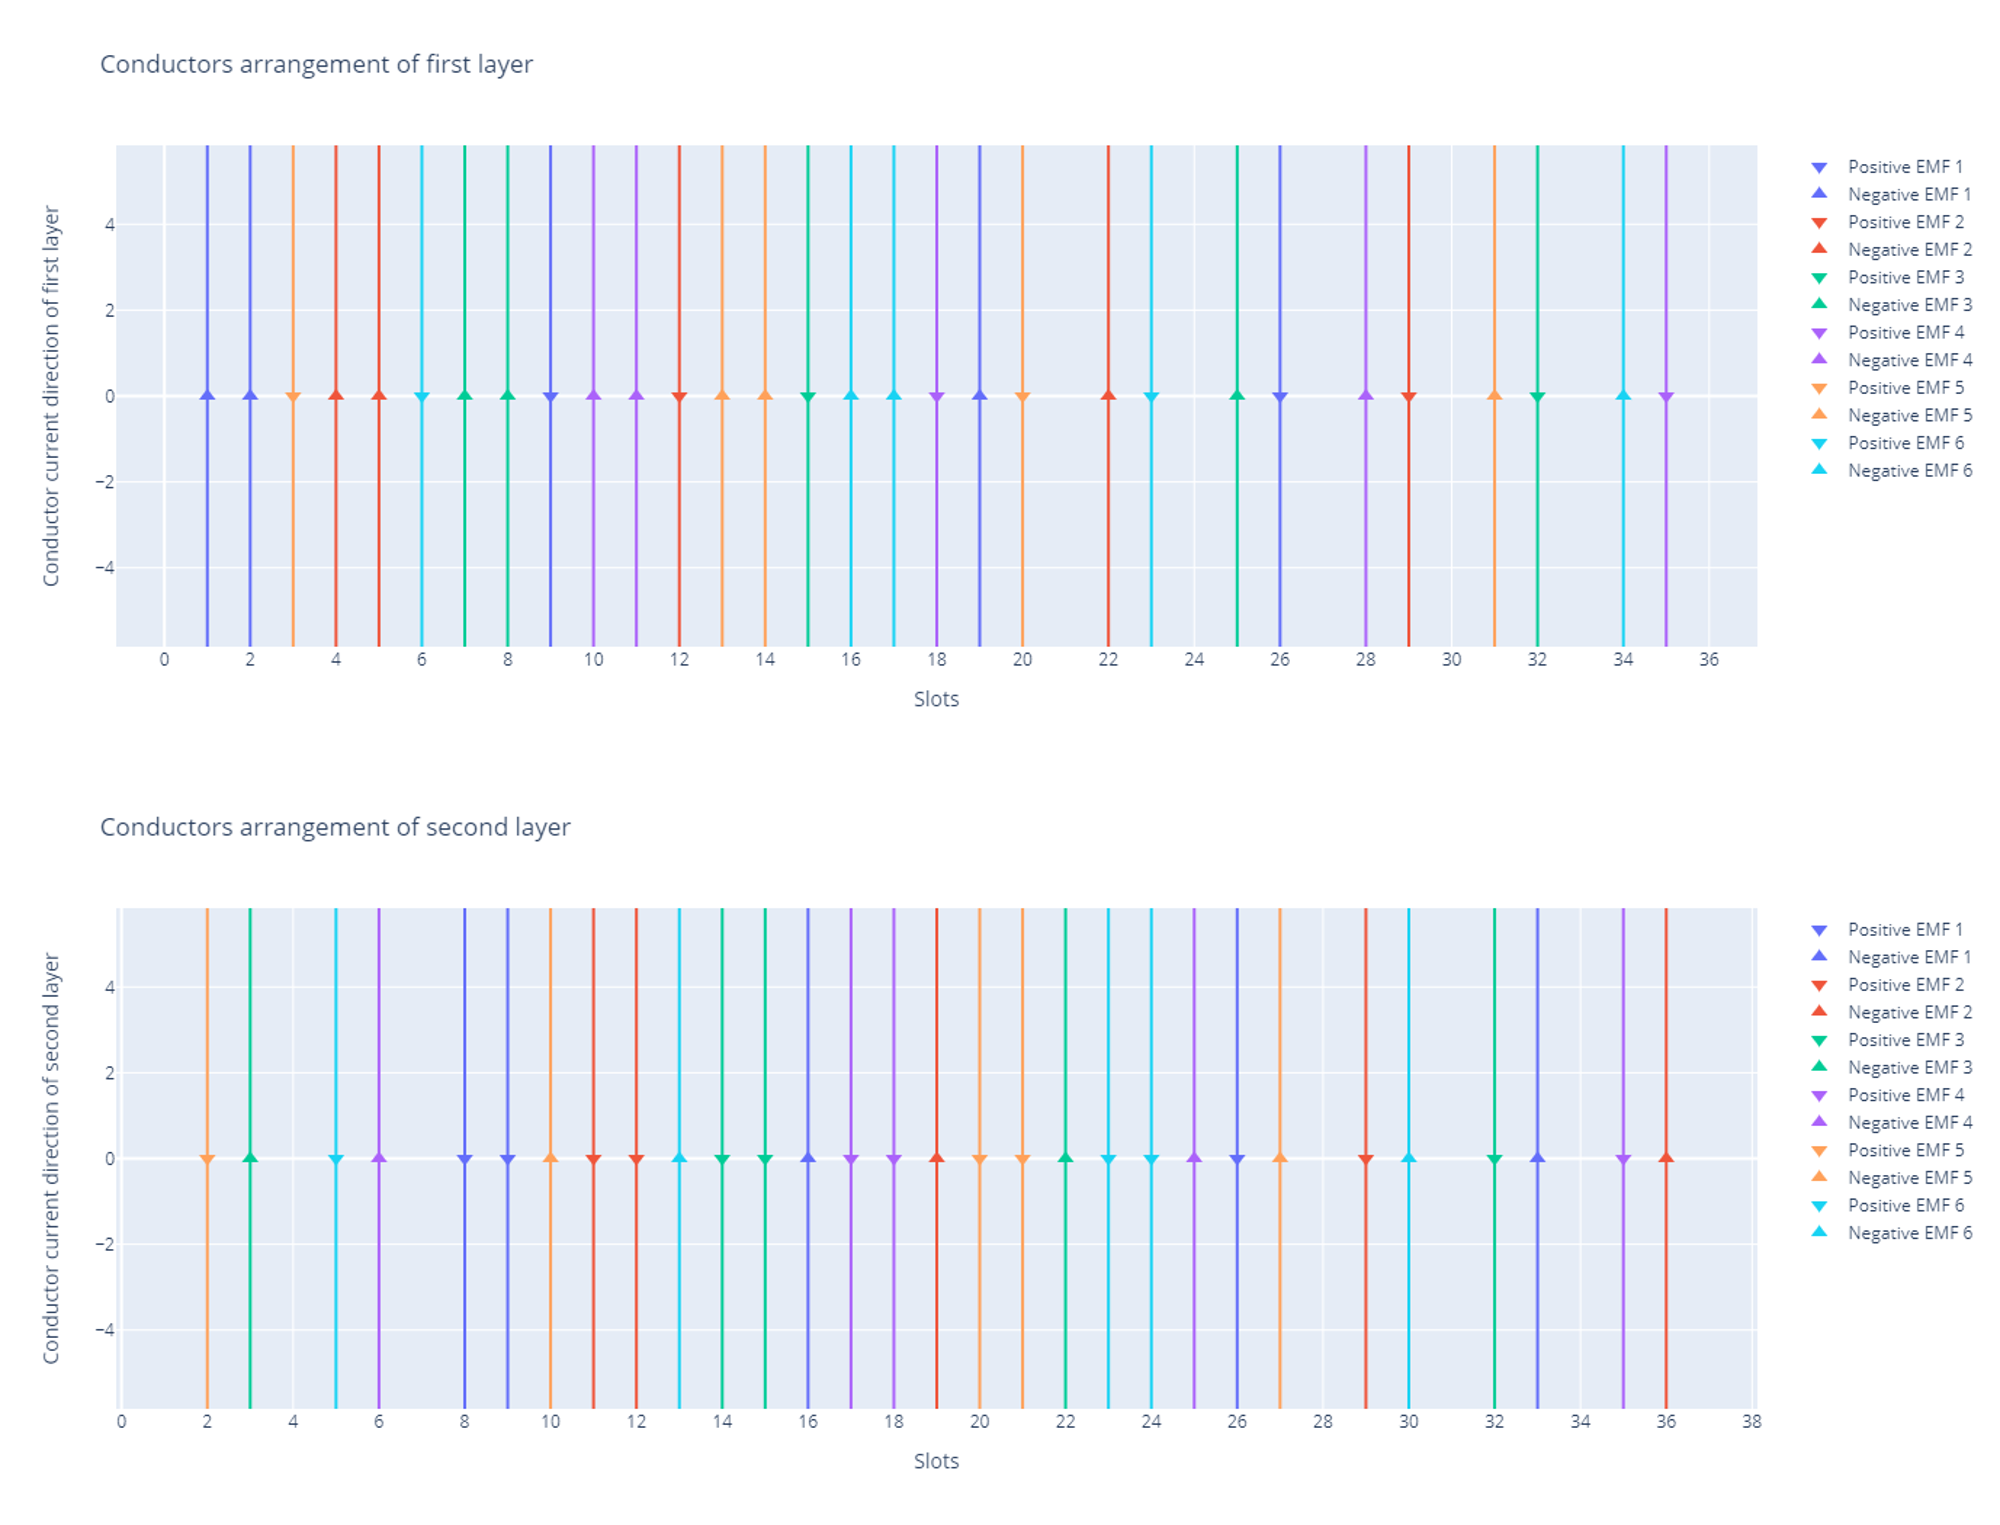

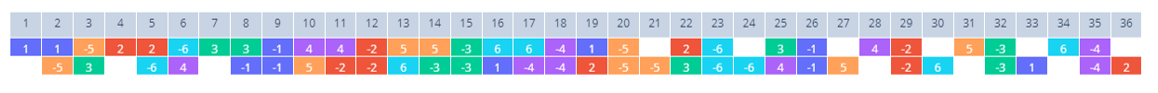
</p>

In [ ]:
# !pip install tqdm

import numpy as np
import pandas as pd
import pdb
import math
import cmath
from fractions import Fraction
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm.auto import tqdm 

%load_ext google.colab.data_table
%pdb off

Automatic pdb calling has been turned OFF


In [ ]:
class winding:
  def __init__(self, m, N, p, n_lay, y, n_es):
    self.error = ""
    self.m = m; self.N = N; self.p = p; self.n_lay = n_lay; self.y = y; self.n_es = n_es
    self.Q =  Fraction(self.N / (2*self.p*self.m)).limit_denominator(1000) * (n_es > 0)
    self.q = Fraction((self.N-self.n_es) / (2 * self.p * self.m)).limit_denominator(1000)
    self.a = math.floor(self.q)
    self.z = int(self.n_lay * self.p * (self.q - self.a))
    self.condition_1 = self.n_lay * (self.N - self.n_es) / (2 * self.m)
    self.t = math.gcd((self.N), self.p)
    self.sys_type = self.compute_type()
    self.condition_2 = ((self.N)/(self.m*self.t))*(self.sys_type == "Normal" or self.sys_type == "Non-reduced") + ((self.N)/(2*self.m*self.t))*(self.sys_type == "Reduced")
    self.zeta = ((self.m-1)/2)*(self.sys_type == "Normal") + ((self.m/2)-1)*(self.sys_type == "Non-reduced") + (0)*(self.sys_type == "Reduced")
    self.alpha_ph = (360/self.m)*(self.sys_type == "Normal" + self.sys_type == "Non-reduced") + (180/self.m)*(self.sys_type == "Reduced")
    self.t_line = math.gcd(self.z, self.p)*(self.n_es <= 0) + (1)*(self.n_es > 0)
    self.N_line = int(self.N/self.t_line)
    self.p_line = int(self.p/self.t_line)
    self.alpha_g = 180/self.m
    self.m_u = self.gpf(self.m) # Number of phases of subsystem groups that compound a reduced winding
    self.m_g = int(self.m/self.m_u) # Number of subsystems that compound a reduced winding
    self.alpha = self.t*360/self.N
    self.WDT = 0
    self.phi_k = np.array([slot*self.alpha for slot in np.arange(self.N * self.n_lay)])
    self.star_of_slots = np.zeros((self.m, 2))
    self.symmetric_star = False
    self.winding_scheme = np.zeros((self.n_lay, self.N))
    self.feasible = self.is_feasible()

    if self.feasible:
      self.star_elements = np.zeros((self.m, int(self.n_lay * (self.N)/self.m), 2))
      self.WDT = self.compute_WDT()
      self.compute_star_of_slots()
    else:
      self.error += str("The winding is not feasible.\n" + "Condition 1:" + str(self.condition_1) + "\nCondition 2:" + str(self.condition_2))

    self.feasible_and_symmetric = self.feasible and self.symmetric_star

  def is_feasible(self): # Verify if the machine is feasible
    if self.n_es >= self.N:
      self.error += " There are more empty slots than the total slots disponible."
      return False
    return (self.condition_1 % 1 == 0) and (self.condition_2 % 1 == 0)

  def compute_type(self): # Machine type: Normal, Non-reduced or Reduced
    if (self.m % 2):
      return "Normal"
    elif not(self.m % 2) and (self.m % 3 == 0):
      return "Non-reduced"
    return "Reduced"

  def gpf(self, n): # Find the largest prime factor
    maxPrime = -1
    while n % 2 == 0:
        maxPrime = 2
        n >>= 1
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        while n % i == 0:
            maxPrime = i
            n = n / i
    if n > 2:
        maxPrime = n  
    return int(maxPrime)

  def print_error(self):
    print(self.error)

  def compute_WDT(self): # Compute the Winding Distribution Table (WDT)
    if self.feasible:
      for k in np.arange(1, self.t_line + 1): # Compute the primitie WDT form
        j = 0
        while (self.N_line + j) % self.m != 0:
          j += 1
        WDT_base = np.zeros(self.N_line + j)
        i = 0
        for slot in np.arange((k-1)*self.N_line + 1, k*self.N_line + 1):
          while WDT_base[i] != 0:
            i = (i + 1)*(i < (self.N_line-1)) + (i-self.N_line)*(i >= (self.N_line-1))
          WDT_base[i] = slot
          i += (self.p_line)
          while i >= self.N_line:
            i = (i)*(i < (self.N_line)) + (i-self.N_line)*(i >= (self.N_line))
        WDT_base = WDT_base.reshape((self.m, int(np.size(WDT_base)/self.m)))
        try:
          WDT_23 = np.hstack((WDT_23, WDT_base[:, : math.ceil((self.N_line-self.n_es)/(2*self.m))]))
          WDT_14 = np.hstack((WDT_14, WDT_base[:, math.ceil((self.N_line-self.n_es)/(2*self.m)) :]))
        except:
          WDT_23 = WDT_base[:, : math.ceil((self.N_line-self.n_es)/(2*self.m))]
          WDT_14 = WDT_base[:, math.ceil((self.N_line-self.n_es)/(2*self.m)) :]
      WDT = np.hstack((WDT_23, WDT_14))
      if self.sys_type == "Normal" or self.sys_type == "Non-reduced":
        if self.n_es > 0:
          WDT = np.hstack((WDT_23, WDT_14))
          WDT_23 = WDT[:, : math.ceil((self.N - self.n_es)/(2*self.m))]
          WDT_14 = WDT[:, math.ceil((self.N - self.n_es)/(2*self.m)) : -math.ceil(self.n_es/self.m)]
        if np.size(WDT_14) != 0:
          WDT_14 = - np.roll(WDT_14, - int(self.zeta*np.size(WDT_14, 1)))
          self.WDT_1lay = np.hstack((WDT_23, WDT_14))
          if self.n_lay == 2:
            WDT_23_2lay = np.where(((abs(WDT_23)+self.y)//self.N > 0) , (abs(WDT_23)+self.y) % self.N, (abs(WDT_23)+self.y))
            WDT_23_2lay = np.where(WDT_23_2lay == 0, self.N, WDT_23_2lay)
            WDT_23_2lay = - np.sign(WDT_23)*WDT_23_2lay
            WDT_14_2lay = np.where(((abs(WDT_14)+self.y)//self.N > 0) , (abs(WDT_14)+self.y) % self.N, (abs(WDT_14)+self.y))
            WDT_14_2lay = np.where(WDT_14_2lay == 0, self.N, WDT_14_2lay)
            WDT_14_2lay = - np.sign(WDT_14)*WDT_14_2lay
            WDT_23 = np.hstack((WDT_23, WDT_23_2lay))
            WDT_14 = np.hstack((WDT_14, WDT_14_2lay))
            self.WDT_2lay = np.hstack((WDT_23_2lay, WDT_14_2lay))
          WDT = np.hstack((WDT_23, WDT_14))
        else:
          if self.n_lay == 2:
            WDT_23_2lay = np.where(((abs(WDT_23)+self.y)//self.N > 0) , (abs(WDT_23)+self.y) % self.N, (abs(WDT_23)+self.y))
            WDT_23_2lay = np.where(WDT_23_2lay == 0, self.N, WDT_23_2lay)
            WDT_23_2lay = - np.sign(WDT_23)*WDT_23_2lay
            WDT_23 = np.hstack((WDT_23, WDT_23_2lay))
            self.WDT_2lay = WDT_23_2lay
          self.WDT_1lay = WDT_23
          WDT = WDT_23
      if self.sys_type == "Reduced":
        if self.n_es > 0:
          WDT = np.hstack((WDT_23, WDT_14))
          WDT_23 = WDT[:, : math.ceil((self.N - self.n_es)/(2*self.m))]
          WDT_14 = WDT[:, math.ceil((self.N - self.n_es)/(2*self.m)) : -math.ceil(self.n_es/self.m)]
        if np.size(WDT_14) != 0:
          if np.size(WDT_23, axis=1) > np.size(WDT_14, axis=1):
            WDT_14 = np.pad(WDT_14, ((0,0),(0,np.size(WDT_23, axis=1) - np.size(WDT_14, axis=1))), mode="constant", constant_values=0.5)
          WDT_23_sup, WDT_23_inf = np.split(WDT_23, 2, 0)
          WDT_14_sup, WDT_14_inf = np.split(WDT_14, 2, 0)
          WDT_23 = np.vstack((WDT_23_sup, WDT_14_sup))
          WDT_14 = np.vstack((- WDT_23_inf, - WDT_14_inf))
          if self.m_u != 2:
            even_phases = 1
            for n in np.arange(self.m_u * self.m_g):
              if not even_phases % 2:
                WDT_23[n] = - WDT_23[n]
                WDT_14[n] = - WDT_14[n]
              even_phases = (even_phases + 1) - (int(even_phases/self.m_u)*self.m_u)
          a = 0
          b = int(self.m/2)
          WDT_23_aux = np.zeros(np.shape(WDT_23))
          WDT_14_aux = np.zeros(np.shape(WDT_14))
          for j in np.arange(1, self.m + 1): # Merge matrix rows
            if j % 2:
              WDT_23_aux[j-1] = WDT_23[a]
              WDT_14_aux[j-1] = WDT_14[a]
              a += 1
            else:
              WDT_23_aux[j-1] = WDT_23[b]
              WDT_14_aux[j-1] = WDT_14[b]
              b += 1
          WDT_23 = WDT_23_aux
          WDT_14 = WDT_14_aux
          self.WDT_1lay = np.hstack((WDT_23, WDT_14))
          if self.n_lay == 2:
            WDT_23_2lay = np.where(((abs(WDT_23)+self.y)//self.N > 0) , (abs(WDT_23)+self.y) % self.N, (abs(WDT_23)+self.y))
            WDT_23_2lay = np.where(WDT_23_2lay == 0, self.N, WDT_23_2lay)
            WDT_23_2lay = - np.sign(WDT_23)*WDT_23_2lay
            WDT_14_2lay = np.where(((abs(WDT_14)+self.y)//self.N > 0) , (abs(WDT_14)+self.y) % self.N, (abs(WDT_14)+self.y))
            WDT_14_2lay = np.where(WDT_14_2lay == 0, self.N, WDT_14_2lay)
            WDT_14_2lay = - np.sign(WDT_14)*WDT_14_2lay
            WDT_23 = np.hstack((WDT_23, WDT_23_2lay))
            WDT_14 = np.hstack((WDT_14, WDT_14_2lay))
            self.WDT_2lay = np.hstack((WDT_23_2lay, WDT_14_2lay))
          WDT = np.hstack((WDT_23, WDT_14))
          WDT = np.where(WDT % 1 != 0, 0, WDT)
        else:
          if self.n_lay == 2:
            WDT_23_2lay = np.where(((abs(WDT_23)+self.y)//self.N > 0) , (abs(WDT_23)+self.y) % self.N, (abs(WDT_23)+self.y))
            WDT_23_2lay = np.where(WDT_23_2lay == 0, self.N, WDT_23_2lay)
            WDT_23_2lay = - np.sign(WDT_23)*WDT_23_2lay
            WDT_23 = np.hstack((WDT_23, WDT_23_2lay))
            self.WDT_2lay = WDT_23_2lay
          self.WDT_1lay = WDT_23
          WDT = WDT_23
    return WDT

  def compute_star_of_slots(self): # Compute the Star of Slots and Star Symmetry
    for ph in np.arange(self.m):
      for i in np.arange(np.size(self.WDT, axis=1)):
        self.star_elements[int(ph), int(i), 0] = np.cos(((np.sign(self.WDT[int(ph), int(i)]) < 0)*180 + self.phi_k[int(abs(self.WDT[int(ph), int(i)])-1)])* np.pi/180)
        self.star_elements[int(ph), int(i), 1] = np.sin(((np.sign(self.WDT[int(ph), int(i)]) < 0)*180 + self.phi_k[int(abs(self.WDT[int(ph), int(i)])-1)])* np.pi/180)
      self.star_of_slots[ph] = np.sum(self.star_elements[ph], axis=0)
    magnitude = np.array([np.linalg.norm(self.star_of_slots[ph]) for ph in np.arange(self.m)])
    comp = np.array([complex(self.star_of_slots[ph,0], self.star_of_slots[ph,1]) for ph in np.arange(self.m)])
    angle = np.angle(comp,deg=True)
    angle = np.round(angle, 4)
    angle.sort()
    target_angle = (360/self.m)*(self.sys_type == "Normal" or self.sys_type == "Non-reduced") + (180/self.m)*(self.sys_type == "Reduced")
    self.symmetric_star = True
    if self.m == 1:
      if (np.size(self.WDT > 0) != np.size(self.WDT < 0)):
        self.symmetric_star = False
        self.error += " This single-phase winding have not coil side conductor symmetry."
    else:
      for d in np.arange(np.size(angle)-1):
        if not(math.isclose(target_angle, np.diff(angle)[d], rel_tol=1e-02, abs_tol=1e-02)) and not(math.isclose(target_angle, 360 - np.diff(angle)[d], rel_tol=1e-02, abs_tol=1e-02)):
          self.symmetric_star = False
          self.error += " This winding have not symmetric EMF (divergence in phasor angles)."
        if not math.isclose(0, np.diff(magnitude)[d], rel_tol=1e-02, abs_tol=1e-02):
          self.symmetric_star = False
          self.error += " This winding have not symmetric EMF (divergence in magnitude of phasors)."
      if np.all(self.star_of_slots <= 1e-02):
        self.symmetric_star = False
        self.error = " No EMF produced because in this winding all phasors are zero"

  def plot_star_and_scheme(self):
    if self.feasible:
      star_elem_to_plot = self.star_elements
      for ph in np.arange(self.m):
        for i in np.arange(1, np.size(self.WDT, axis=1)):
          star_elem_to_plot[int(ph), int(i), 0] = star_elem_to_plot[int(ph), int(i-1), 0] + star_elem_to_plot[int(ph), int(i), 0]
          star_elem_to_plot[int(ph), int(i), 1] = star_elem_to_plot[int(ph), int(i-1), 1] + star_elem_to_plot[int(ph), int(i), 1]
      self.compute_winding_scheme()
      fig1 = go.Figure(layout=go.Layout(title=go.layout.Title(text="Slot Voltage Phasor")))
      fig2 = go.Figure(layout=go.Layout(title=go.layout.Title(text="Conductors arrangement of first layer")))
      fig3 = go.Figure(layout=go.Layout(title=go.layout.Title(text="Conductors arrangement of second layer")))
      if n_lay == 1:
        tabel_colors = [px.colors.qualitative.Plotly[abs(int(e[0]))-1]*(abs(int(e[0]))>0) + "white"*(abs(int(e[0]))<=0) for e in np.transpose(self.winding_scheme)]
      else:
        tabel_colors = [[px.colors.qualitative.Plotly[abs(int(e[0]))-1]*(abs(int(e[0]))>0) + "white"*(abs(int(e[0]))<=0), px.colors.qualitative.Plotly[abs(int(e[1]))-1]*(abs(int(e[1]))>0) + "white"*(abs(int(e[1]))<=0)] for e in np.transpose(self.winding_scheme)]
      fig4 = go.Figure(data=[go.Table(header=dict(values=np.arange(1, self.N+1), align='center'), cells=dict(values=np.transpose(self.winding_scheme), fill_color=tabel_colors, font=dict(color='white')))])
      for ph in np.arange(self.m):
        fig1.add_trace(go.Scatter(x=np.hstack(([0],star_elem_to_plot[ph,:,0])), y=np.hstack(([0],star_elem_to_plot[ph,:,1])), line = dict(dash='dot', color=px.colors.qualitative.Plotly[ph]), name="Coil EMF " + str(ph+1)))
        fig1.add_trace(go.Scatter(x=[0, self.star_of_slots[ph, 0]], y=[0, self.star_of_slots[ph, 1]], line = dict(color=px.colors.qualitative.Plotly[ph]) , name="Phase " + str(ph+1)))
        fig2.add_trace(go.Scatter(mode="markers", marker_symbol=6, marker=dict(size=10, opacity=1, color=px.colors.qualitative.Plotly[ph]), x=abs(self.WDT_1lay[ph,np.where(self.WDT_1lay[ph] < 0)[0]]), y=abs(np.zeros(np.shape(self.WDT_1lay[ph,np.where(self.WDT_1lay[ph] < 0)[0]]))),name="Positive EMF " + str(ph+1)))
        fig2.add_trace(go.Scatter(mode="markers", marker_symbol=5, marker=dict(size=10, opacity=1, color=px.colors.qualitative.Plotly[ph]), x=abs(self.WDT_1lay[ph,np.where(self.WDT_1lay[ph] > 0)[0]]), y=abs(np.zeros(np.shape(self.WDT_1lay[ph,np.where(self.WDT_1lay[ph] > 0)[0]]))), name="Negative EMF " + str(ph+1)))
        try:
          fig3.add_trace(go.Scatter(mode="markers", marker_symbol=6, marker=dict(size=10, opacity=1, color=px.colors.qualitative.Plotly[ph]), x=abs(self.WDT_2lay[ph,np.where(self.WDT_2lay[ph] < 0)[0]]), y=abs(np.zeros(np.shape(self.WDT_2lay[ph,np.where(self.WDT_2lay[ph] < 0)[0]]))),name="Positive EMF " + str(ph+1)))
          fig3.add_trace(go.Scatter(mode="markers", marker_symbol=5, marker=dict(size=10, opacity=1, color=px.colors.qualitative.Plotly[ph]), x=abs(self.WDT_2lay[ph,np.where(self.WDT_2lay[ph] > 0)[0]]), y=abs(np.zeros(np.shape(self.WDT_2lay[ph,np.where(self.WDT_2lay[ph] > 0)[0]]))), name="Negative EMF " + str(ph+1)))
        except:
          pass
        for cond in np.arange((self.N-self.n_es)/self.m):
          fig2.add_vline(x=abs(self.WDT_1lay[ph, int(cond)]), line_color=px.colors.qualitative.Plotly[ph])
          try:
            fig3.add_vline(x=abs(self.WDT_2lay[ph, int(cond)]), line_color=px.colors.qualitative.Plotly[ph])
          except:
            pass
      slots_to_plot = np.arange(1, self.N+1)
      if self.n_lay == 2:
        slots_to_plot = np.hstack((np.arange(1, self.N+1), np.arange(1, self.N+1)))
      cond_to_plot = self.winding_scheme.reshape(1, np.size(self.winding_scheme))
      fig1.update_yaxes(scaleanchor = "x", scaleratio = 1)
      fig1.show()
      fig2.update_yaxes(scaleanchor = "x", scaleratio = 1)
      fig2.update_xaxes(nticks=self.N)
      fig2.update_layout(xaxis_title="Slots", yaxis_title="Conductor current direction of first layer")
      fig2.show()
      if n_lay == 2:
        fig3.update_yaxes(scaleanchor = "x", scaleratio = 1)
        fig3.update_xaxes(nticks=self.N)
        fig3.update_layout(xaxis_title="Slots", yaxis_title="Conductor current direction of second layer")
        fig3.show()
      fig4.update_layout(xaxis_title="Slots", yaxis_title="Winding Scheme")
      fig4.show()

  def compute_winding_scheme(self):
    if self.feasible:
      for ph in np.arange(self.m):
        for i in np.arange(0, (self.N-self.n_es) / self.m):
          self.winding_scheme[0, int(abs(self.WDT_1lay[int(ph), int(i)])-1)] = np.sign(self.WDT_1lay[int(ph), int(i)])*(ph+1)
          if self.n_lay == 2:
            self.winding_scheme[1, int(abs(self.WDT_2lay[int(ph), int(i)])-1)] = np.sign(self.WDT_2lay[int(ph), int(i)])*(ph+1)
    else:
       self.error = " Is not possible compute the winding scheme because this configuration is not feaseble."

In [ ]:
# ------------------------------------------------------------------------------
# Try the following code to compute the star-of-slots, the conductior direction 
# disposition for all layers and the table of winding schemes.
# ------------------------------------------------------------------------------

m = 6
N = 36
p = 2
n_lay = 2
y = 7
n_es = 6

wd = winding( m, N, p, n_lay, y, n_es)
print(wd.WDT)
wd.print_error()
wd.plot_star_and_scheme()

[[  1.  19.   2.  -8. -26.  -9. -26.  -9.  33.  16.]
 [  4.  22.   5. -11. -29. -12. -29. -12.  36.  19.]
 [  7.  25.   8. -14. -32. -15. -32. -15.   3.  22.]
 [ 10.  28.  11. -17. -35. -18. -35. -18.   6.  25.]
 [ 13.  31.  14. -20.  -2. -21. -20.  -3.  27.  10.]
 [ 16.  34.  17. -23.  -5. -24. -23.  -6.  30.  13.]]



In [ ]:
def feasible_winding_table(m, n_lay, y, n_es, N_min, N_max, p_min, p_max):
  table = np.zeros((N_max,p_max))
  for N in np.arange(N_min, N_max+1):
    for p in np.arange(p_min, p_max+1):
      wd = winding( m, N, p, n_lay, y, n_es)
      table[N-1, p-1] = int(wd.feasible)
  return table

def feasible_and_symmetric_winding_table(m, n_lay, y, n_es, N_min, N_max, p_min, p_max):
  table = np.zeros((N_max,p_max))
  for N in np.arange(N_min, N_max+1):
    for p in np.arange(p_min, p_max+1):
      wd = winding( m, N, p, n_lay, y, n_es)
      table[N-1, p-1] = int(wd.feasible_and_symmetric)
  return table

def plot_winding_table(df):
  df.replace(0, "-", inplace = True)
  df.replace(1, "OK", inplace = True)
  df.insert(0, -1, np.arange(1, N_max+1))
  numer_colors = [[px.colors.qualitative.Plotly[0] if df.iloc[row, col] == "OK" else "#E2E2E2" for row in np.arange(N_max)] for col in np.arange(p_max+1)]
  fig = go.Figure(data=[go.Table(header=dict(values=list(df.columns+1)), header_prefix="p=" ,cells=dict(values=[df.iloc[:, i] for i in np.arange(p_max+1)], fill_color=numer_colors))])
  fig.show()


In [ ]:
# ------------------------------------------------------------------------------
# Robustness test.
# ------------------------------------------------------------------------------

m_max = 12
n_lay_max = 2
y_max = 8
N_max = 96
p_max = 10
n_es_max = 15

print("Robustness test of winding creator algorithm.")
pbar1 = tqdm(range(1, m_max+1))
pbar1.set_description("Phases:")

try:
  for m in pbar1:
    for n_lay in tqdm(range(1, n_lay_max+1), leave=False, ascii=True, desc="Layers"):
      for y in tqdm(range(1, y_max+1), leave=False, ascii=True, desc="Coil pitch"):
        for n_es in tqdm(range(0, n_es_max+1),  leave=False, ascii=True, desc="Empty Slots"):
          df = pd.DataFrame(feasible_and_symmetric_winding_table(m, n_lay, y, n_es, 1, N_max, 1, p_max))
  print("Successful tested.")
except:
  print("Error! The algorithm breaks")

Robustness test of winding creator algorithm.


  0%|          | 0/12 [00:00<?, ?it/s]

Layers:   0%|          | 0/2 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Layers:   0%|          | 0/2 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Layers:   0%|          | 0/2 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Layers:   0%|          | 0/2 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Layers:   0%|          | 0/2 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Layers:   0%|          | 0/2 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Layers:   0%|          | 0/2 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Layers:   0%|          | 0/2 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Layers:   0%|          | 0/2 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Layers:   0%|          | 0/2 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Layers:   0%|          | 0/2 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Layers:   0%|          | 0/2 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Coil pitch:   0%|          | 0/8 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Empty Slots:   0%|          | 0/16 [00:00<?, ?it/s]

Successful tested.


In [ ]:
# ------------------------------------------------------------------------------
# Try the following code to compute the feasible winding table.
# ------------------------------------------------------------------------------

m = 4; n_lay = 2; y = 3; n_es = 0
N_min = 1; N_max = 40  
p_min = 1; p_max = 20

df = pd.DataFrame(feasible_winding_table(m, n_lay, y, n_es, N_min, N_max, p_min, p_max))
plot_winding_table(df)

In [ ]:
# ------------------------------------------------------------------------------
# Try the following code to compute the feasible and symmetric winding table.
# ------------------------------------------------------------------------------

m = 4; n_lay = 2; y = 3; n_es = 0
N_min = 1; N_max = 40  
p_min = 1; p_max = 20

df = pd.DataFrame(feasible_and_symmetric_winding_table(m, n_lay, y, n_es, N_min, N_max, p_min, p_max))
plot_winding_table(df)